In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
import pickle

In [2]:
f_data = pd.read_csv('FlightDelays.csv')

In [3]:
f_data.head(10)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight_Status
0,1455,OH,1455,JFK,184,01-01-2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01-01-2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01-01-2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01-01-2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01-01-2004,7792,IAD,0,4,1,N698BR,ontime
5,840,DH,839,JFK,228,01-01-2004,7800,IAD,0,4,1,N687BR,ontime
6,1240,DH,1243,JFK,228,01-01-2004,7806,IAD,0,4,1,N321UE,ontime
7,1645,DH,1644,JFK,228,01-01-2004,7810,IAD,0,4,1,N301UE,ontime
8,1715,DH,1710,JFK,228,01-01-2004,7812,IAD,0,4,1,N328UE,ontime
9,2120,DH,2129,JFK,228,01-01-2004,7814,IAD,0,4,1,N685BR,ontime


In [4]:
# rename the column name
f_data=f_data.rename(columns={"Flight_Status": "FLIGHT_STATUS"})

In [5]:
# Check if there are any null values in the dataframe
f_data.isnull().any()

CRS_DEP_TIME     False
CARRIER          False
DEP_TIME         False
DEST             False
DISTANCE         False
FL_DATE          False
FL_NUM           False
ORIGIN           False
Weather          False
DAY_WEEK         False
DAY_OF_MONTH     False
TAIL_NUM         False
FLIGHT_STATUS    False
dtype: bool

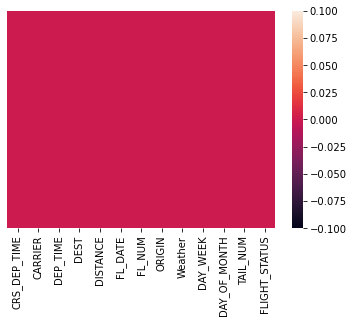

In [6]:
#Check for null values in the dataset
sns.heatmap(f_data.isnull(), yticklabels=False)
plt.show()

In [7]:
# check the data types of all the columns before modeling
print(f_data.dtypes)

CRS_DEP_TIME      int64
CARRIER          object
DEP_TIME          int64
DEST             object
DISTANCE          int64
FL_DATE          object
FL_NUM            int64
ORIGIN           object
Weather           int64
DAY_WEEK          int64
DAY_OF_MONTH      int64
TAIL_NUM         object
FLIGHT_STATUS    object
dtype: object


In [8]:
f_data.head(10)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,FLIGHT_STATUS
0,1455,OH,1455,JFK,184,01-01-2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01-01-2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01-01-2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01-01-2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01-01-2004,7792,IAD,0,4,1,N698BR,ontime
5,840,DH,839,JFK,228,01-01-2004,7800,IAD,0,4,1,N687BR,ontime
6,1240,DH,1243,JFK,228,01-01-2004,7806,IAD,0,4,1,N321UE,ontime
7,1645,DH,1644,JFK,228,01-01-2004,7810,IAD,0,4,1,N301UE,ontime
8,1715,DH,1710,JFK,228,01-01-2004,7812,IAD,0,4,1,N328UE,ontime
9,2120,DH,2129,JFK,228,01-01-2004,7814,IAD,0,4,1,N685BR,ontime


In [10]:
print(f_data.columns)
len(f_data.columns)

Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'FLIGHT_STATUS'],
      dtype='object')


13

In [11]:
#converting the object type to categorical data
#substitute to adding dummy variables
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [12]:
#selecting cols that need to be transformed
flight_df = pd.DataFrame(f_data, columns = ['CARRIER', 'DEST', 'FL_DATE', 'ORIGIN','TAIL_NUM','FLIGHT_STATUS'])

# Encoding the variable
fit = flight_df.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))


,CARRIER,DEST,FL_DATE,ORIGIN,TAIL_NUM,FLIGHT_STATUS
0,OH,JFK,01-01-2004,BWI,N940CA,ontime
1,DH,JFK,01-01-2004,DCA,N405FJ,ontime
2,DH,LGA,01-01-2004,IAD,N695BR,ontime
3,DH,LGA,01-01-2004,IAD,N662BR,ontime
4,DH,LGA,01-01-2004,IAD,N698BR,ontime
...,...,...,...,...,...,...
2196,RU,EWR,1/31/2004,DCA,N15555,ontime
2197,RU,EWR,1/31/2004,IAD,N16976,ontime
2198,RU,EWR,1/31/2004,DCA,N14902,ontime
2199,RU,EWR,1/31/2004,DCA,N16961,ontime


In [13]:
# Using the dictionary to label future data
flight_category=pd.DataFrame(flight_df.apply(lambda x: d[x.name].transform(x)))

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(flight_category[['CARRIER', 'DEST', 'FL_DATE', 'ORIGIN','TAIL_NUM']]).toarray())
flights_df =enc_df
# flights_df

In [14]:
#add the rest of the cols to the dataframe
flights_df['CRS_DEP_TIME']=f_data['CRS_DEP_TIME']
flights_df['DEP_TIME']=f_data['DEP_TIME']
flights_df['DISTANCE']=f_data['DISTANCE']
flights_df['FL_NUM']=f_data['FL_NUM']
flights_df['Weather']=f_data['Weather']
flights_df['DAY_WEEK']=f_data['DAY_WEEK']
flights_df['DAY_OF_MONTH']=f_data['DAY_OF_MONTH']
flights_df['FLIGHT_STATUS']=f_data['FLIGHT_STATUS']

In [15]:
flights_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,592,593,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH,FLIGHT_STATUS
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1455,1455,184,5935,0,4,1,ontime
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1640,1640,213,6155,0,4,1,ontime
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1245,1245,229,7208,0,4,1,ontime
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1715,1709,229,7215,0,4,1,ontime
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1039,1035,229,7792,0,4,1,ontime
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,840,839,228,7800,0,4,1,ontime
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1240,1243,228,7806,0,4,1,ontime
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1645,1644,228,7810,0,4,1,ontime
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1715,1710,228,7812,0,4,1,ontime
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2120,2129,228,7814,0,4,1,ontime


In [16]:
#select dependent and independent variables

X = flights_df.drop({'FLIGHT_STATUS'}, axis=1)
y = flights_df['FLIGHT_STATUS']

# SVM Classifier

In [17]:
#split dataset into train and test data by 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [23]:
# Fitting SVM to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_svc = classifier.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy of Support vector classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred_svc)))

Accuracy of Support vector classifier on test set: 0.89


In [30]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svc).ravel()
print("Confusion Matrix:", tn, " ", fp, " ", fn, " ", tp)

Confusion Matrix: 64   72   1   524


In [31]:
from sklearn.metrics import classification_report
print('Classification report:',classification_report(y_test, y_pred_svc))

Classification report:               precision    recall  f1-score   support

     delayed       0.98      0.47      0.64       136
      ontime       0.88      1.00      0.93       525

    accuracy                           0.89       661
   macro avg       0.93      0.73      0.79       661
weighted avg       0.90      0.89      0.87       661



In [32]:
filename = 'SVC_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))